<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/2_1POO_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programación Orientada por Objetos**

0. Se procede con la carga de las librerias

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis #  Coeficiente de asimetría, Kurtosis

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos

In [32]:
nkl = "/content/drive/MyDrive/Integración/3. FallasTecnologicas (1).xlsx"
XDB = pd.read_excel(nkl, sheet_name=0)
XDB.head(100)

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105
...,...,...,...,...,...
95,Semana 96,115,25.2722,1,1.3816
96,Semana 97,75,8.8613,6,1.2785
97,Semana 98,85,19.7139,1,0.6788
98,Semana 99,80,1.4179,3,14.7925


In [33]:
Xf =XDB.iloc[:,3]
Xs = XDB.iloc[:,4]
LDA = np.multiply(Xf,Xs) #Este es el producto entre las dos variables
dfLDA=pd.DataFrame(LDA) #Guardamos los datos en una tabla

2. Se procede con el muestreo de la variable aleatoria

In [34]:
#Se hace el muestreo a 100 datos
LDA100= dfLDA.sample(n=100, replace=False)
media100 = np.mean(LDA100)
print("La media de los datos es:",media100)

La media de los datos es: 8.821608


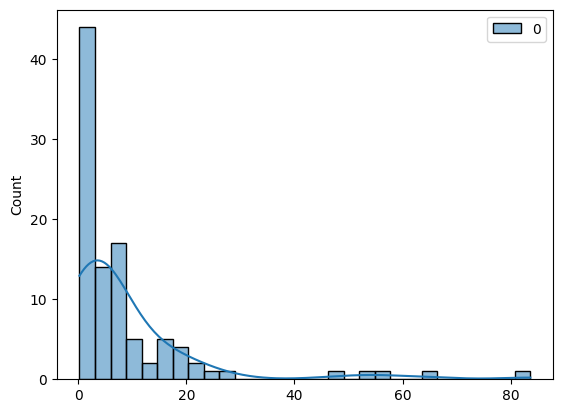

In [35]:
plt.figure()
sns.histplot(LDA100, kde=True)
plt.show()

3. Se crea la función muestreo

In [87]:
def muestreo(ND, dfLDA,p):
  #ND: Número de datos de muestreo
  #dfLDA: Son los datos enviados al método
  #Método: forma de hacer las cosas
  #p: es la

  LDAm=dfLDA.sample(n=ND, replace=True)
  media = np.mean(LDAm)
  LI= media+1.96*np.std(LDAm)
  LS= media-1.96*np.std(LDAm)

  plt.figure()
  sns.histplot(LDAm, kde=True)
  plt.show()

  cas= skew(LDAm)
  ck= kurtosis(LDAm)

  ek2=((1.96**2)*p*(1-p)/ND)

  return media,LDAm,LI,LS,cas,ck,ek2 #Que quiero que esto me arroje: Variables de Salida
                    #Este método me entrega la media, y los datos muestreados

In [77]:
def tipodist(cas, ck):
    if abs(cas) < 0.5 and abs(ck) < 0.5:
        tpdst = "Posible distribución Normal"
    elif cas > 0 and ck > 3:
        # Correctly indent the code inside this block
        if ck >= 8:
            tpdst = "Posible distribución Exponencial"
        elif ck >= 6:
            tpdst = "Posible distribución Gamma"
        else:
            tpdst = "Posible distribución Weibull"
    elif cas < 0 and ck < 3:
        tpdst = "Posible distribución Beta"
    elif ck < 3:
        tpdst = "Posible distribución Uniforme"
    else:
        tpdst = "No se puede determinar la distribución"
    return tpdst  # nos va a entregar el tipo de distribucion

4. Procedemos con el muestreo

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


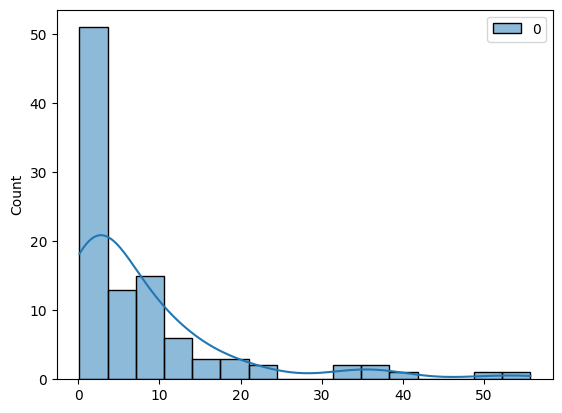

La media de los datos es: 7.950196000000001
El limite inferior es: 0    28.840546
dtype: float64
El limite superior es: 0   -12.940154
dtype: float64
El coeficiente de asimetría es: [2.40695406]
El coeficiente de curtosis es: [6.10947336]
El tipo de dsitribución es: Posible distribución Gamma
El error es de: 0.00038031840000000023


In [88]:
#Muestreo a una confiabilidad el 99%
media99,LDAm99,LI99,LS99,cas99,ck99,ek299= muestreo(100,dfLDA,0.99)
print("La media de los datos es:",media99)
print("El limite inferior es:",LI99)
print("El limite superior es:",LS99)
print("El coeficiente de asimetría es:",cas99)
print("El coeficiente de curtosis es:",ck99)
print("El tipo de dsitribución es:",tipodist(cas99,ck99))
print("El error es de:",ek299)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


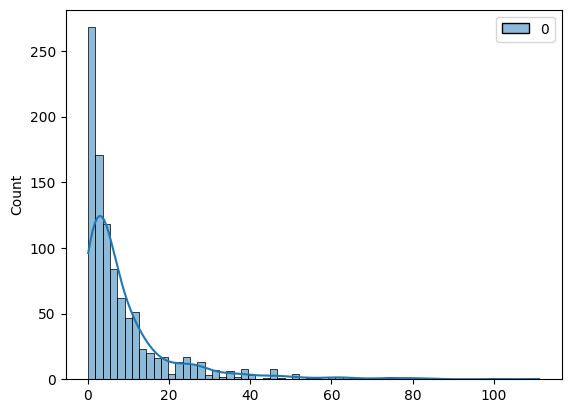

La media de los datos es: 9.2387756
El limite inferior es: 0    34.623986
dtype: float64
El limite superior es: 0   -16.146435
dtype: float64
El coeficiente de asimetría es: [3.19305039]
El coeficiente de curtosis es: [13.36233018]
El tipo de dsitribución es: Posible distribución Exponencial
El error es de: 3.837758400000003e-06


In [89]:
#Muestreo a una confiabilidad del 99,9%
media999, LDAm999,LI999,LS999,cus999,kur999,ek2999= muestreo(1000,dfLDA,0.999)
print("La media de los datos es:",media999)
print("El limite inferior es:",LI999)
print("El limite superior es:",LS999)
print("El coeficiente de asimetría es:",cus999)
print("El coeficiente de curtosis es:",kur999)
print("El tipo de dsitribución es:",tipodist(cus999,kur999))
print("El error es de:",ek2999)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


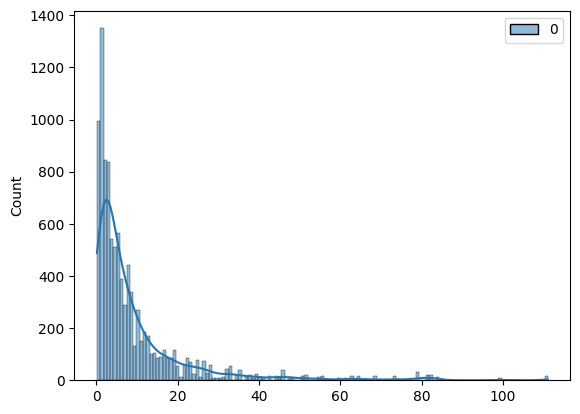

La media de los datos es: 9.459251309999999
El limite inferior es: 0    36.240007
dtype: float64
El limite superior es: 0   -17.321505
dtype: float64
El coeficiente de asimetría es: [3.39202467]
El coeficiente de curtosis es: [14.52873956]
El tipo de dsitribución es: Posible distribución Exponencial
El error es de: 3.841215839999577e-08


In [90]:
#Muestreo a una confiabilidad del 99,99%
media9999, LDAm9999,LI9999,LS9999,cas9999,kur9999,ek29999= muestreo(10000,dfLDA,0.9999)
print("La media de los datos es:",media9999)
print("El limite inferior es:",LI9999)
print("El limite superior es:",LS9999)
print("El coeficiente de asimetría es:",cas9999)
print("El coeficiente de curtosis es:",kur9999)
print("El tipo de dsitribución es:",tipodist(cas9999,kur9999))
print("El error es de:",ek29999)